<a href="https://colab.research.google.com/github/azizbahrululum76/MBKM/blob/main/Machine_Learning_Motor_Vehicle_Collisions_Aziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Data

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Membuat path untuk mengidentifikasi letak directory
# Catatan : pastikan path yang anda masukkan sesuai dengan directory data anda. Kemungkinan besar path di contoh ini berbeda dengan penyimpanan data anda
path = '/content/drive/My Drive/data/'

In [10]:
import os
import pandas as pd
import numpy as np


data = pd.read_csv(os.path.join(path, "motor_collisions.csv"), delimiter=',')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1905260 entries, 0 to 1905259
Data columns (total 32 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   crash_date                     object 
 1   crash_time                     object 
 2   borough                        object 
 3   zip_code                       float64
 4   latitude                       float64
 5   longitude                      float64
 6   Location                       object 
 7   on_street_name                 object 
 8   cross_street_name              object 
 9   off_street_name                object 
 10  number_of_persons_injured      float64
 11  number_of_persons_killed       float64
 12  number_of_pedestrians_injured  float64
 13  number_of_pedestrians_killed   float64
 14  number_of_cyclist_injured      float64
 15  number_of_cyclist_killed       float64
 16  number_of_motorist_injured     float64
 17  number_of_motorist_killed      float64
 18  co

In [ ]:
# Check the data types of columns
print(data.dtypes)

crash_date                        object
crash_time                        object
borough                           object
zip_code                         float64
latitude                         float64
longitude                        float64
Location                          object
on_street_name                    object
cross_street_name                 object
off_street_name                   object
number_of_persons_injured        float64
number_of_persons_killed         float64
number_of_pedestrians_injured    float64
number_of_pedestrians_killed     float64
number_of_cyclist_injured        float64
number_of_cyclist_killed         float64
number_of_motorist_injured       float64
number_of_motorist_killed        float64
contributing_factor_vehicle_1     object
contributing_factor_vehicle_2     object
contributing_factor_vehicle_3     object
contributing_factor_vehicle_4     object
contributing_factor_vehicle_5     object
collision_id                     float64
vehicle_type_cod

#EDA

In [ ]:
# Perform EDA on Crash Date and Crash Time
data['crash_date'] = pd.to_datetime(data['crash_date'])
data['crash_time'] = pd.to_datetime(data['crash_time'], format='%H:%M').dt.time


In [ ]:
# Explore the distribution of crashes over time
data['year'] = data['crash_date'].dt.year
data['month'] = data['crash_date'].dt.month
data['day'] = data['crash_date'].dt.day

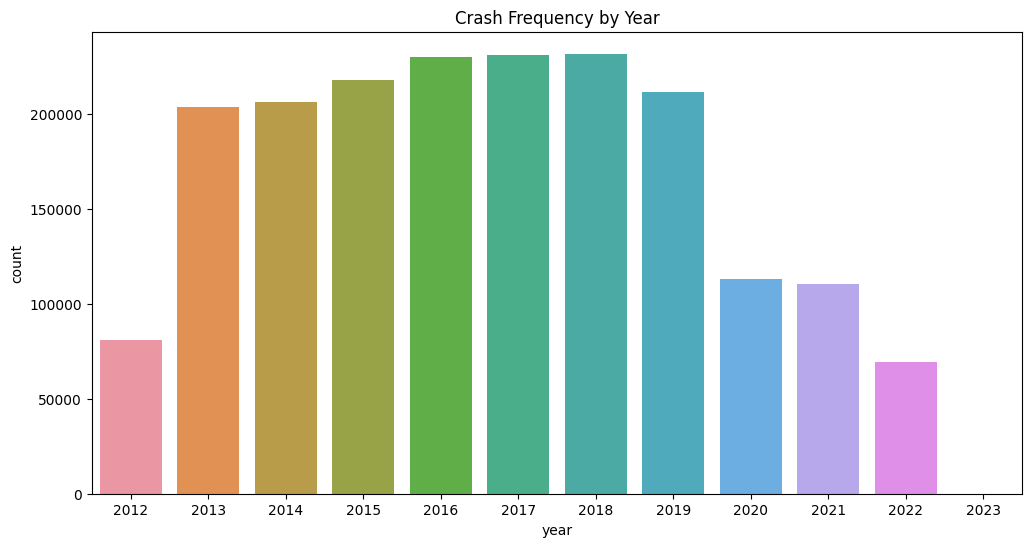

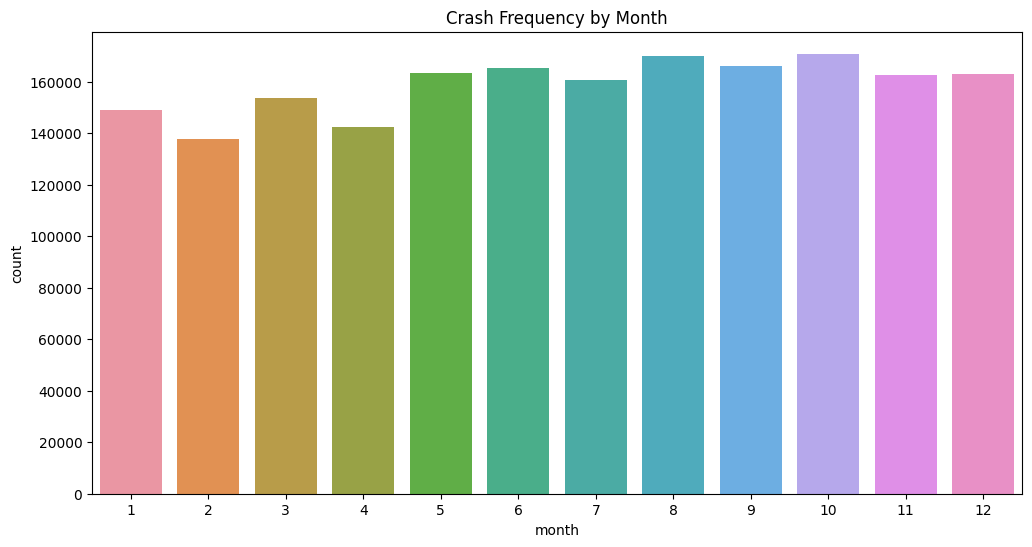

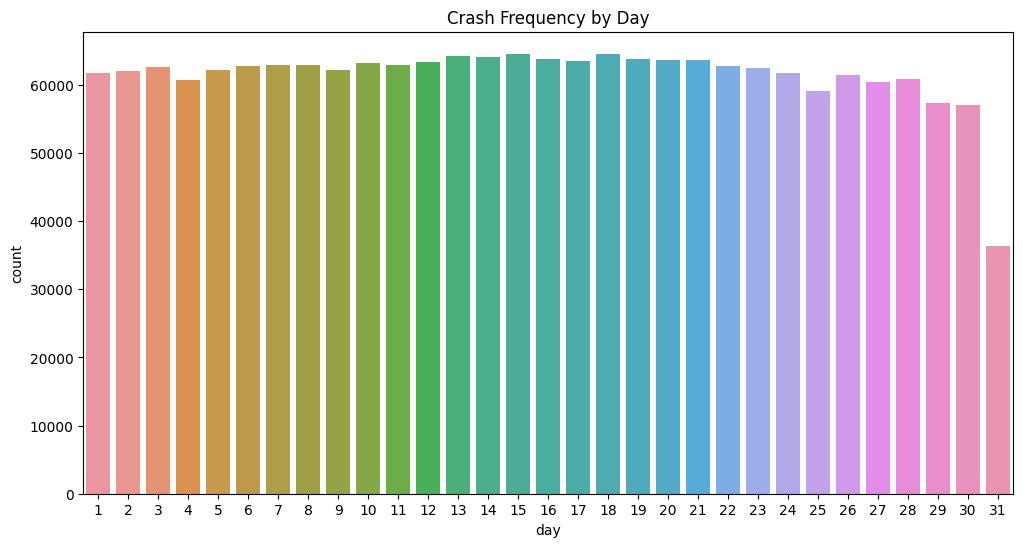

In [ ]:
# Plot the frequency of crashes by year, month, and day
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(x='year', data=data)
plt.title('Crash Frequency by Year')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=data)
plt.title('Crash Frequency by Month')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=data)
plt.title('Crash Frequency by Day')
plt.show()


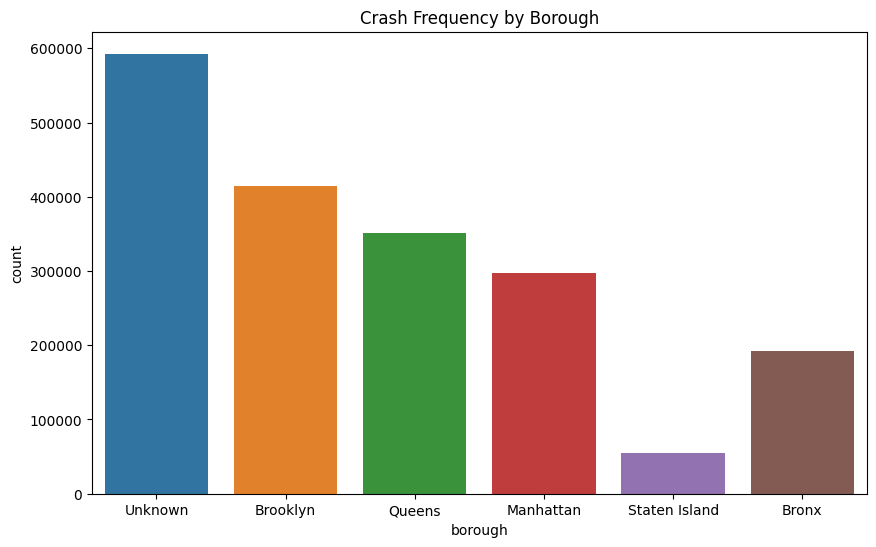

In [ ]:
# Analyze the distribution of crashes across boroughs
plt.figure(figsize=(10, 6))
sns.countplot(x='borough', data=data)
plt.title('Crash Frequency by Borough')
plt.show()

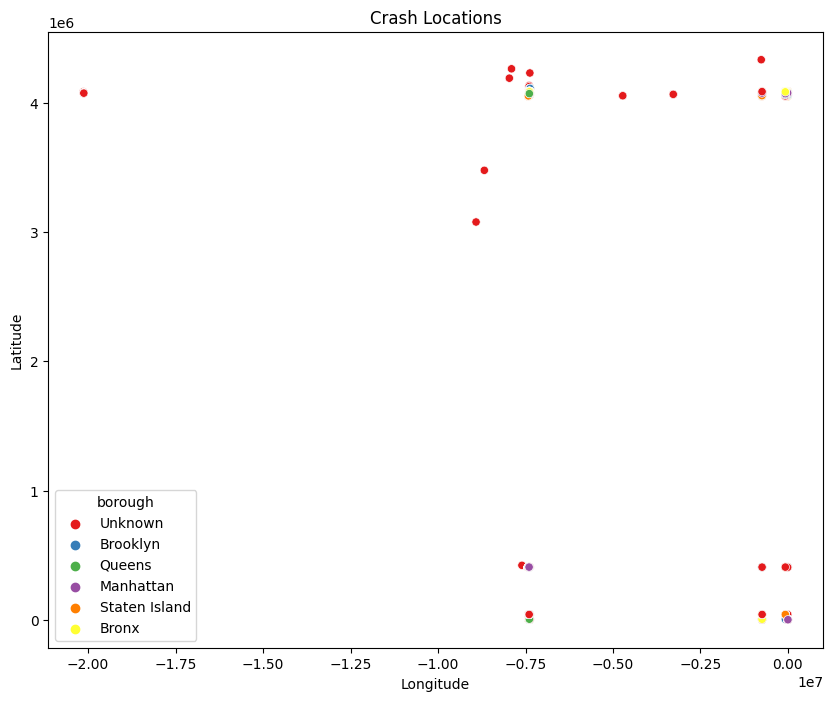

In [ ]:
# Visualize the geographical coordinates of the crashes on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, hue='borough', palette='Set1')
plt.title('Crash Locations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

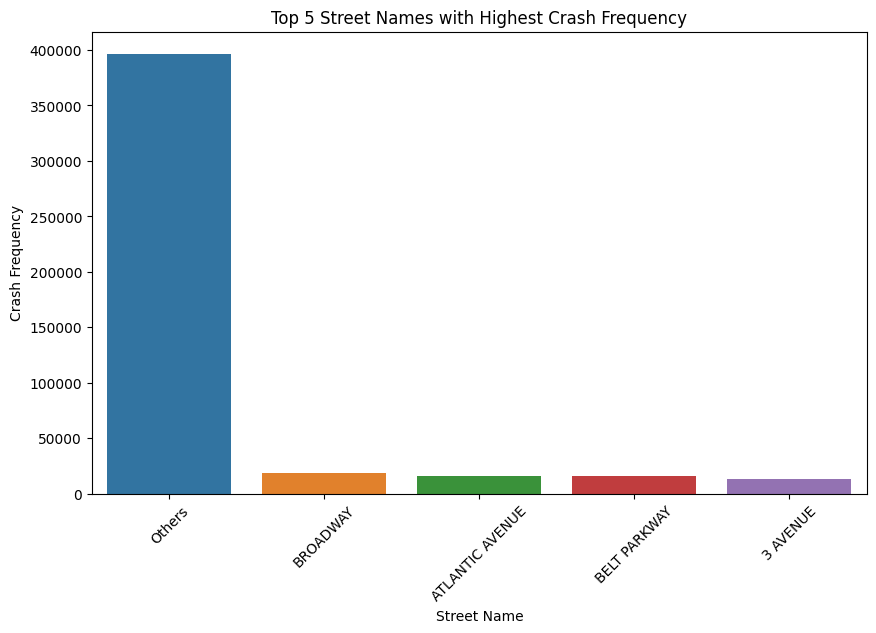

In [ ]:
# Analyze the most frequently occurring street names involved in collisions
top_street_names = data['on_street_name'].value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_street_names.index, y=top_street_names.values)
plt.title('Top 5 Street Names with Highest Crash Frequency')
plt.xlabel('Street Name')
plt.ylabel('Crash Frequency')
plt.xticks(rotation=45)
plt.show()

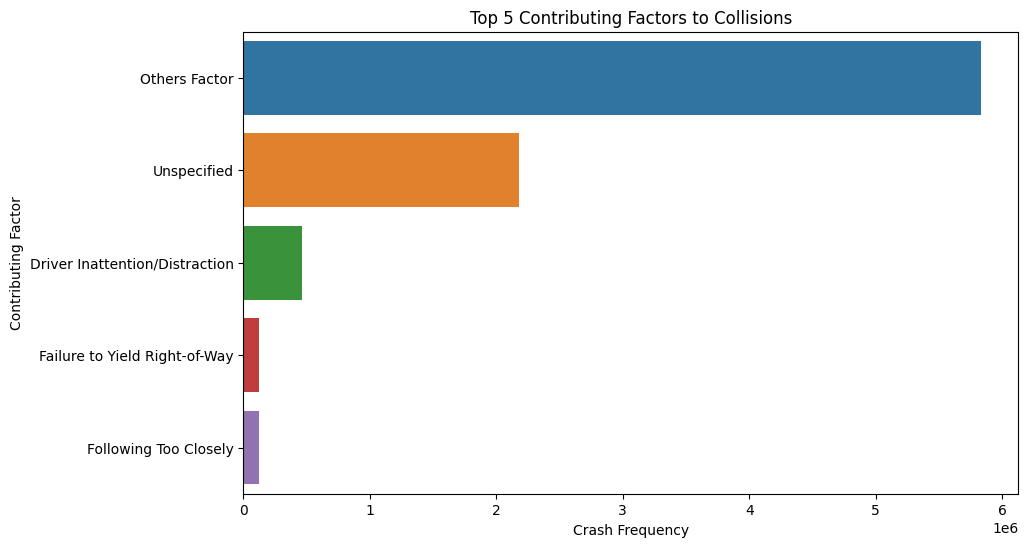

In [ ]:
# Analyze the most common contributing factors to collisions
contributing_factors = data[['contributing_factor_vehicle_1', 'contributing_factor_vehicle_2',
                            'contributing_factor_vehicle_3', 'contributing_factor_vehicle_4',
                            'contributing_factor_vehicle_5']]
contributing_factors = contributing_factors.stack().value_counts().head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=contributing_factors.values, y=contributing_factors.index)
plt.title('Top 5 Contributing Factors to Collisions')
plt.xlabel('Crash Frequency')
plt.ylabel('Contributing Factor')
plt.show()

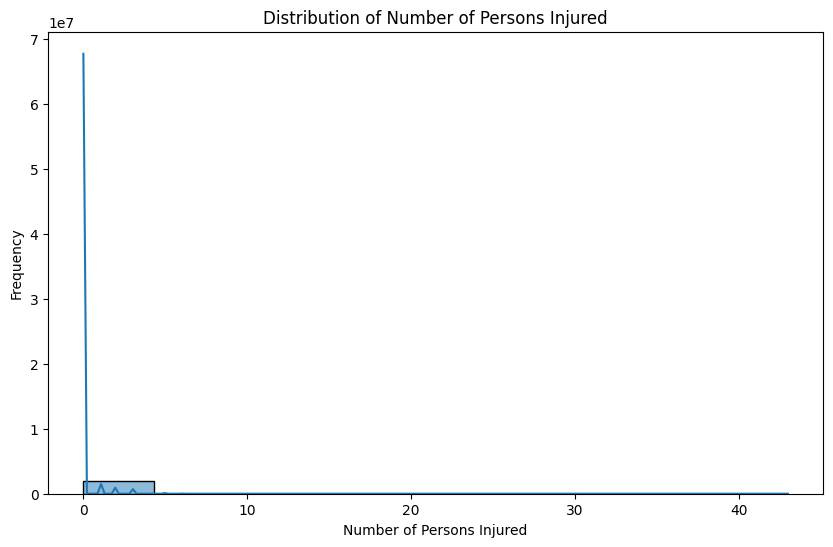

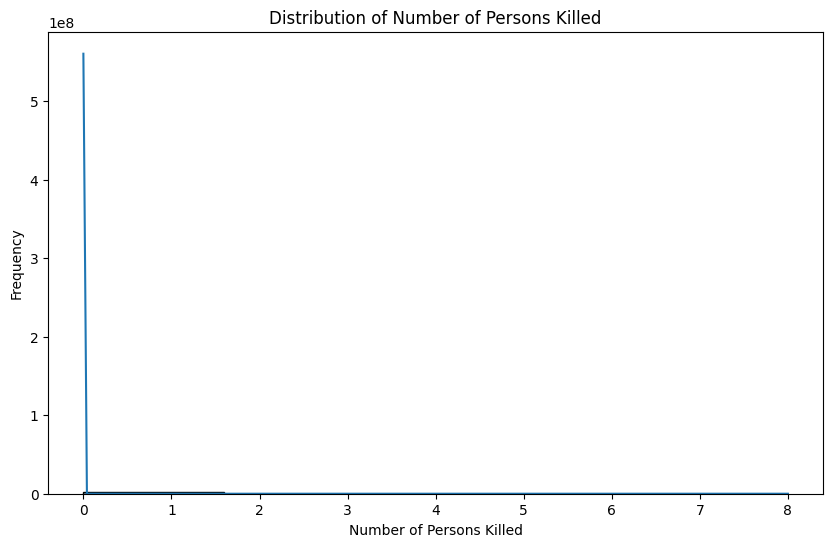

In [ ]:
#Analyzing the Distribution of Number of Persons Injured or Killed:
plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_persons_injured'], bins=10, kde=True)
plt.title('Distribution of Number of Persons Injured')
plt.xlabel('Number of Persons Injured')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['number_of_persons_killed'], bins=5, kde=True)
plt.title('Distribution of Number of Persons Killed')
plt.xlabel('Number of Persons Killed')
plt.ylabel('Frequency')
plt.show()


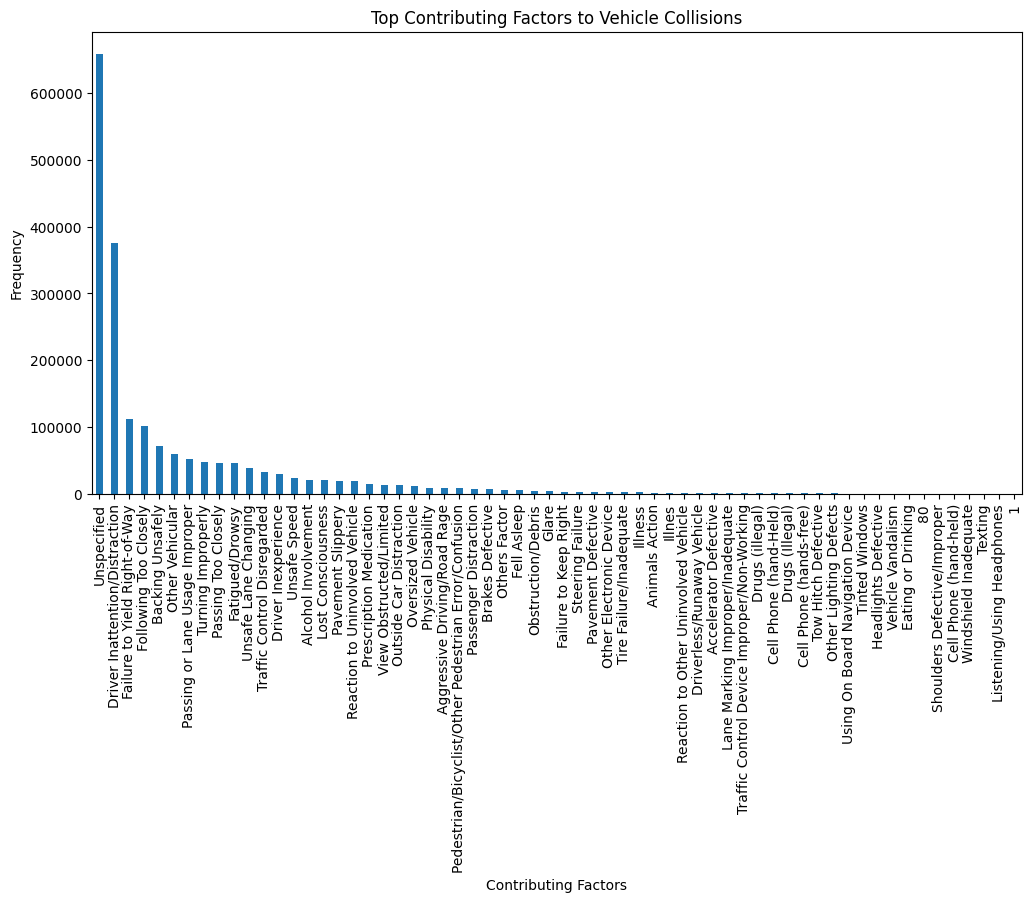

In [ ]:
# Visualizing the Contributing Factors to Vehicle Collisions:
plt.figure(figsize=(12, 6))
data['contributing_factor_vehicle_1'].value_counts().plot(kind='bar')
plt.title('Top Contributing Factors to Vehicle Collisions')
plt.xlabel('Contributing Factors')
plt.ylabel('Frequency')
plt.show()


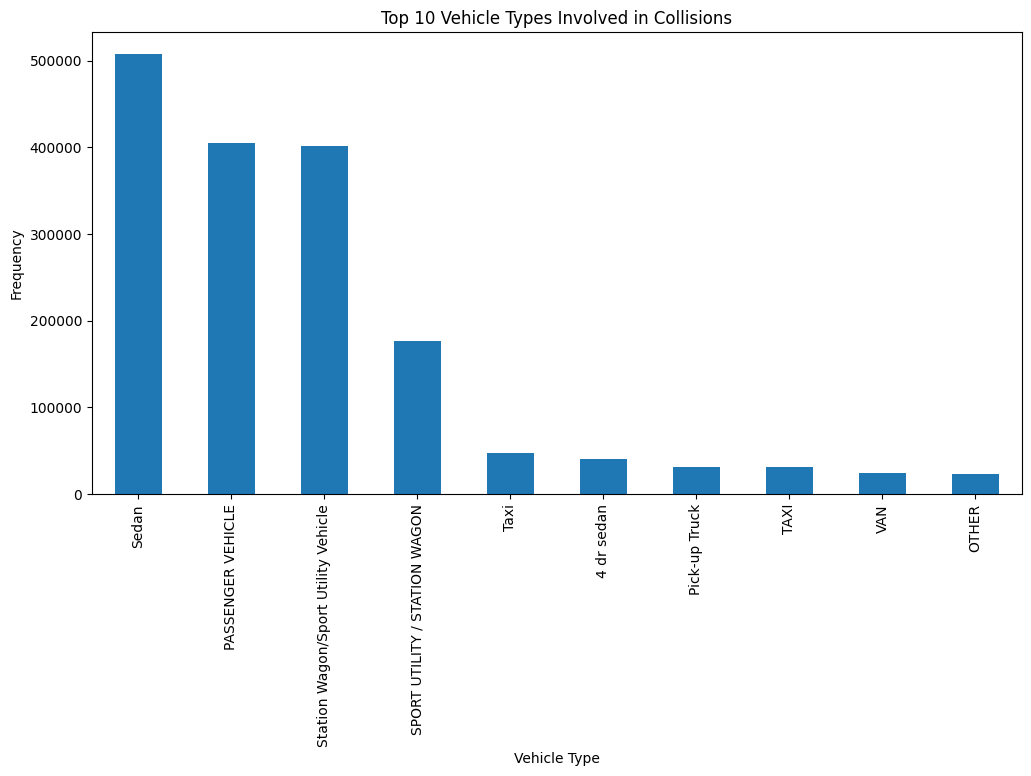

In [ ]:
#Analyzing the Types of Vehicles Involved in Collisions:
plt.figure(figsize=(12, 6))
data['vehicle_type_code_1'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Vehicle Types Involved in Collisions')
plt.xlabel('Vehicle Type')
plt.ylabel('Frequency')
plt.show()


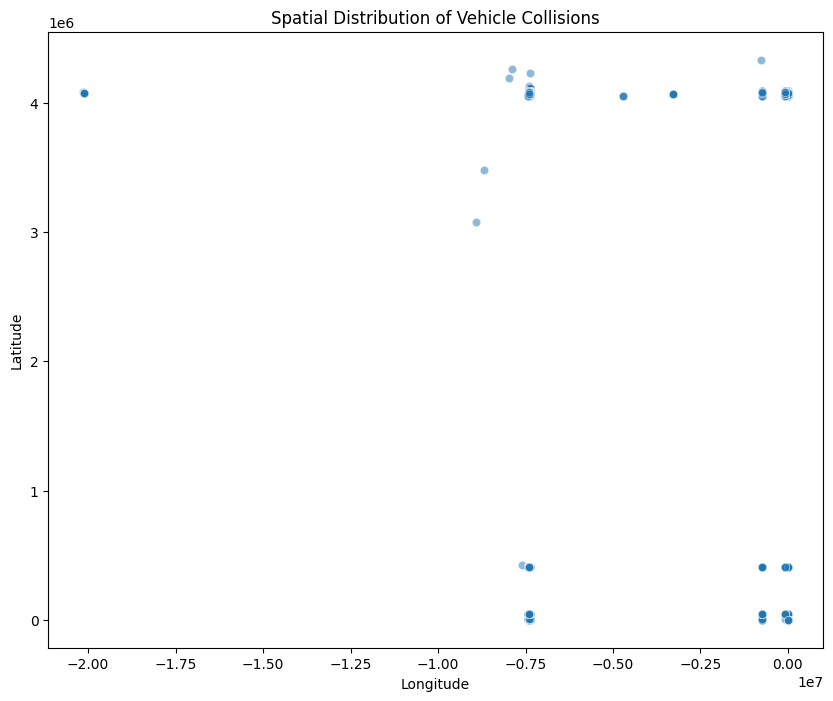

In [ ]:
#Investigating the Spatial Distribution of Collisions:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='longitude', y='latitude', data=data, alpha=0.5)
plt.title('Spatial Distribution of Vehicle Collisions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Jumlah kecelakaan berdasarkan faktor kontribusi kendaraan 1:
Unspecified                       659027
Driver Inattention/Distraction    375745
Failure to Yield Right-of-Way     111947
Following Too Closely             101489
Backing Unsafely                   71731
                                   ...  
Cell Phone (hand-held)                78
Windshield Inadequate                 72
Texting                               46
Listening/Using Headphones            23
1                                     10
Name: contributing_factor_vehicle_1, Length: 62, dtype: int64


#Modelling Machine Learning

##Regresi Logistik

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Memilih fitur yang akan digunakan
features = ['total_injured', 'total_collision']
target = 'number_of_persons_killed'
data = data[features + [target]].dropna()

# Memisahkan data menjadi data latih dan data uji
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Melatih model menggunakan Regresi Logistik
model = LogisticRegression()
model.fit(X_train, y_train)

# Menguji model menggunakan data uji
y_pred = model.predict(X_test)

# Menghitung akurasi model
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model:", accuracy)

# Melihat koefisien dan intercept dari model
print("Koefisien model:", model.coef_)
print("Intercept model:", model.intercept_)

Akurasi model: 0.999968507656576
Koefisien model: [[ 9.8151497  -9.91621757]
 [ 0.11132596 -0.14182586]
 [-3.12421692  3.08780496]
 [-3.98857495  4.03227202]
 [-2.81368379  2.93796646]]
Intercept model: [ 17.96945252   6.6788422   -5.0261526  -11.45192175  -8.17022037]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


- Akurasi model adalah 0,999968507656576, yang menunjukkan tingkat akurasi yang tinggi dalam memprediksi variabel target.
- Koefisien model adalah sebagai berikut:
   1. Untuk fitur pertama 'total_injured', koefisiennya adalah [9,8151497, -9,91621757].
   2. Untuk fitur kedua 'total_collision', koefisiennya adalah [0,11132596, -0,14182586]. Koefisien ini menggambarkan pengaruh masing-masing fitur terhadap log-odds variabel target. Koefisien positif menunjukkan hubungan positif, sedangkan koefisien negatif menunjukkan hubungan negatif.
- Intercept model adalah [17,96945252, 6,6788422, -5,0261526, -11,45192175, -8,17022037]. Intercept ini mewakili log-odds dasar untuk masing-masing kelas variabel target ketika semua fitur bernilai nol.

##Random Forest Classifier

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Menghapus baris dengan nilai null atau kosong
data_rf = data.dropna()

# Memilih variabel yang akan digunakan dalam model
features1 = ['number_of_persons_injured', 'number_of_persons_killed', 'number_of_pedestrians_injured', 'number_of_pedestrians_killed', 'number_of_cyclist_injured', 'number_of_cyclist_killed', 'number_of_motorist_injured', 'number_of_motorist_killed']

# Memisahkan variabel target (total_killed) dan fitur-fitur
X_rf = data_rf[features1]
y_rf = data_rf['total_killed']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

# Membuat model Random Forest Classifier
model_rf = RandomForestClassifier()

# Melatih model menggunakan data latih
model_rf.fit(X_train, y_train)

# Memprediksi hasil untuk data uji
y_pred_rf = model_rf.predict(X_test)

# Menghitung akurasi model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classifier Accuracy:", accuracy_rf)

# Menampilkan kepentingan fitur
feature_importance = model_rf.feature_importances_
for feature, importance in zip(features1, feature_importance):
    print(f"Feature: {feature}, Importance: {importance}")


Random Forest Classifier Accuracy: 1.0
Feature: number_of_persons_injured, Importance: 0.0012803870442135512
Feature: number_of_persons_killed, Importance: 0.5369840617402073
Feature: number_of_pedestrians_injured, Importance: 0.0007044507901704372
Feature: number_of_pedestrians_killed, Importance: 0.27347675958533385
Feature: number_of_cyclist_injured, Importance: 0.00017023436121015468
Feature: number_of_cyclist_killed, Importance: 0.03194323712790603
Feature: number_of_motorist_injured, Importance: 0.001112601335535073
Feature: number_of_motorist_killed, Importance: 0.15432826801542354


- Akurasi model Random Forest Classifier: 1.0, yang berarti model memiliki akurasi 100% dalam memprediksi target pada data uji. Hal ini menunjukkan kinerja yang sangat baik dari model. <br>Selanjutnya, hasil output menampilkan kepentingan fitur (feature importance) dari setiap fitur yang digunakan dalam model. Kepentingan fitur menunjukkan seberapa besar pengaruh masing-masing fitur terhadap prediksi model. Berikut adalah interpretasi dari hasil kepentingan fitur:
- Fitur "number_of_persons_injured" memiliki kepentingan sebesar 0.0012803870442135512. Kepentingan fitur ini relatif rendah, artinya fitur ini memiliki pengaruh yang minim terhadap prediksi model.
- Fitur "number_of_persons_killed" memiliki kepentingan sebesar 0.5369840617402073. Kepentingan fitur ini sangat tinggi, artinya fitur ini memiliki pengaruh yang sangat besar terhadap prediksi model.
- Fitur "number_of_pedestrians_injured" memiliki kepentingan sebesar 0.0007044507901704372. Kepentingan fitur ini relatif rendah, artinya fitur ini memiliki pengaruh yang minim terhadap prediksi model.
- Fitur "number_of_pedestrians_killed" memiliki kepentingan sebesar 0.27347675958533385. Kepentingan fitur ini cukup tinggi, artinya fitur ini memiliki pengaruh yang signifikan terhadap prediksi model.
- Fitur "number_of_cyclist_injured" memiliki kepentingan sebesar 0.00017023436121015468. Kepentingan fitur ini relatif rendah, artinya fitur ini memiliki pengaruh yang minim terhadap prediksi model.
- Fitur "number_of_cyclist_killed" memiliki kepentingan sebesar 0.03194323712790603. Kepentingan fitur ini cukup tinggi, artinya fitur ini memiliki pengaruh yang signifikan terhadap prediksi model.
- Fitur "number_of_motorist_injured" memiliki kepentingan sebesar 0.001112601335535073. Kepentingan fitur ini relatif rendah, artinya fitur ini memiliki pengaruh yang minim terhadap prediksi model.
- Fitur "number_of_motorist_killed" memiliki kepentingan sebesar 0.15432826801542354. Kepentingan fitur ini cukup tinggi, artinya fitur ini memiliki pengaruh yang signifikan terhadap prediksi model. <br><br>Dari hasil tersebut, dapat dilihat bahwa fitur "number_of_persons_killed", "number_of_pedestrians_killed", "number_of_cyclist_killed", dan "number_of_motorist_killed" memiliki kepentingan yang signifikan dalam memprediksi target pada model ini. Sementara itu, fitur "number_of_persons_injured", "number_of_pedestrians_injured", "number_of_cyclist_injured", dan "number_of_motorist_injured" memiliki kepentingan yang lebih rendah.

##Support Vector Machines (SVM):

In [16]:
from sklearn.svm import SVC

# Membuat model Support Vector Machine (SVM)
model_svm = SVC()

# Melatih model menggunakan data latih
model_svm.fit(X_train, y_train)

# Memprediksi hasil untuk data uji
y_pred_svm = model_svm.predict(X_test)

# Menghitung akurasi model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machine Accuracy:", accuracy_svm)

# Menampilkan vektor pendukung (support vectors)
print("Support Vectors:")
print(model_svm.support_vectors_)

# Menampilkan koefisien dual
print("Dual Coefficients:")
print(model_svm.dual_coef_)

# Menampilkan nilai bias (intercept)
print("Intercept:")
print(model_svm.intercept_)


Support Vector Machine Accuracy: 0.999988254915318
Support Vectors:
[[43.  0.  0. ...  0. 43.  0.]
 [32.  0.  2. ...  0. 30.  0.]
 [10.  0.  2. ...  0.  8.  0.]
 ...
 [ 1.  4.  0. ...  0.  1.  4.]
 [15.  4.  3. ...  0. 12.  2.]
 [12.  8.  7. ...  2.  4.  0.]]
Dual Coefficients:
[[ 0.07005922  0.0699473   0.06965303 ... -1.         -1.
  -1.        ]
 [ 0.61910369  0.61902743  0.6178416  ... -1.         -1.
  -1.        ]
 [ 0.22424815  0.2242257   0.22407184 ... -1.         -1.
  -1.        ]
 [ 0.09871999  0.0990599   0.09883809 ... -1.         -1.
  -1.        ]
 [ 0.03490316  0.03493291  0.03470593 ... -1.         -1.
  -1.        ]
 [ 0.01745158  0.01746646  0.01735296 ...  0.5         0.5
  -1.        ]]
Intercept:
[ 0.92996699  0.38093615  0.77576303  0.90098021  0.96511681  0.98256021
 -0.8890642  -0.4988755  -0.07869513  0.38019215  0.69007596  0.62951035
  0.8173369   0.93368754  0.96684171  0.50569378  0.7863809   0.89317295
  0.5035266   0.73529883  0.5       ]


- Support Vector Machine Accuracy: 0.999988254915318
Akurasi model SVM mengindikasikan sejauh mana model dapat memprediksi secara benar. Dalam kasus ini, akurasi mencapai 0.999988254915318, yang mendekati nilai 1.0. Semakin tinggi nilai akurasi, semakin baik model dapat melakukan prediksi yang tepat.

- Support Vectors:
Support vectors adalah subset dari data latih yang digunakan untuk membentuk batas keputusan SVM. Setiap baris dalam output ini mewakili suatu vektor pendukung. Vektor pendukung ini memiliki nilai-nilai fitur yang digunakan dalam proses pelatihan model SVM.

- Dual Coefficients:
Dual coefficients adalah bobot yang diberikan kepada setiap vektor pendukung dalam pembentukan keputusan klasifikasi. Matriks ini menunjukkan koefisien dual yang berkaitan dengan tingkat pentingnya setiap vektor pendukung dalam model SVM. Semakin besar koefisien dual, semakin besar kontribusi vektor pendukung tersebut terhadap keputusan klasifikasi.

- Intercept:
Intercept, juga dikenal sebagai bias, adalah nilai konstanta yang mempengaruhi posisi batas keputusan SVM. Nilai ini menunjukkan di mana batas keputusan akan berada relatif terhadap sumbu nilai prediksi. Intercept juga dapat memberikan informasi tentang tingkat keputusan klasifikasi yang dibuat oleh model SVM.

#Kesimpulan

In [17]:
# Menentukan model terbaik berdasarkan akurasi
best_model = ""
best_accuracy = 0.0

if accuracy > best_accuracy:
    best_model = "Logistic Regression"
    best_accuracy = accuracy

if accuracy_svm > best_accuracy:
    best_model = "SVM"
    best_accuracy = accuracy_svm

if accuracy_rf > best_accuracy:
    best_model = "Random Forest"
    best_accuracy = accuracy_rf

# Menampilkan akurasi model terbaik
print("Model Terbaik:", best_model)
print("Akurasi Model:", best_accuracy)

Model Terbaik: Random Forest
Akurasi Model: 1.0
